<a href="https://colab.research.google.com/github/Afranur-Artar/Deep-Learning-NLP-Project/blob/main/Churn_Modelling_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling_ANN_Classification.csv to Churn_Modelling_ANN_Classification.csv


In [6]:
df=pd.read_csv("Churn_Modelling_ANN_Classification.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [7]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [8]:
print(df.shape)
df.info()

(10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


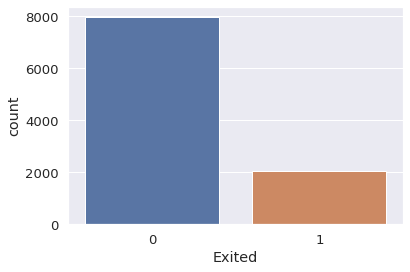

In [10]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.Exited);

In [11]:
print("Number of exited customer: % {:.3f}".format(len(df[df["Exited"]==1])/len(df)*100))
print("Number of no exited customer: % {:.3f}".format(len(df[df["Exited"]==0])/len(df)*100))

Number of exited customer: % 20.370
Number of no exited customer: % 79.630


In [12]:
def credit_score(x):
    if x>=350 and x<=450:
        return 1
    elif x>450 and x<=550:
        return 2
    elif x>550 and x<=650:
        return 3
    elif x>650 and x<=750:
        return 4
    elif x>750 and x<=850:
        return 5

df["CreditScore_def"]=df["CreditScore"].apply(lambda x: credit_score(x))

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_def
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5


In [13]:
df["Gender"]=pd.get_dummies(df["Gender"], drop_first=True)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_def
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,3
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,3


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encod=LabelEncoder()

df["Geography"]=label_encod.fit_transform(df["Geography"])

df.head(3)

# Geography==0 --> France
# Geography==1 --> Germany
# Geography==2 --> Spain

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_def
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,3
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


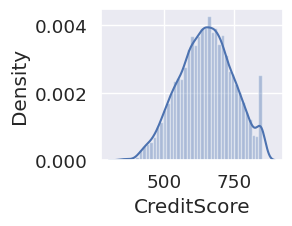

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


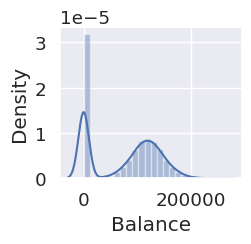

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


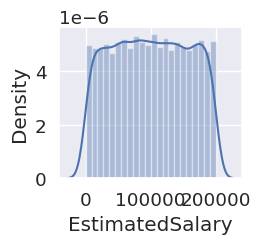

In [15]:
column=["CreditScore","Balance","EstimatedSalary"]

for i in range(len(column)):
    plt.figure(figsize=(8,2), dpi=100)
    plt.subplot(1,3,i+1)
    sns.distplot(df[column[i]])
    plt.show()
    

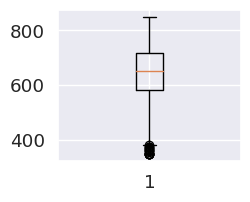

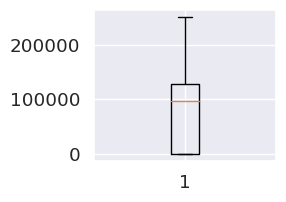

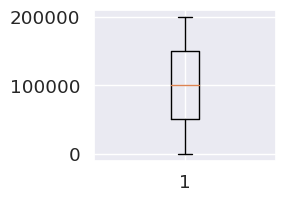

In [16]:
column=["CreditScore","Balance","EstimatedSalary"]
  
for i in range(len(column)):
    plt.figure(figsize=(8,2), dpi=100)
    plt.subplot(1,3,i+1)
    plt.boxplot(df[column[i]])
    plt.show()

In [17]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
X=df.drop(["Exited","CreditScore_def"], axis=1)
Y=df["Exited"]

sm=SMOTE(random_state=42, ratio=1.0)

X_smote, Y_smote = sm.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
print(X_smote.shape)
print(Y_smote.shape)

(15926, 10)
(15926,)


In [20]:
pd.DataFrame(Y_smote).value_counts()

1    7963
0    7963
dtype: int64

In [21]:
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_smote,Y_smote, test_size=0.30, random_state=42)

In [22]:
log_smote=LogisticRegression()

log_smote.fit(X_smote_train,Y_smote_train)

y_test_predict_smote=log_smote.predict(X_smote_test)

print(accuracy_score(Y_smote_test, y_test_predict_smote))

0.6611552951025533


### With SMOTE logistic regression accuracy is %66 so is very low

In [23]:
X=df.drop(["Exited","CreditScore_def"], axis=1)
Y=df["Exited"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7000, 10)
(3000, 10)
(7000,)
(3000,)


In [25]:
log_reg=LogisticRegression()

log_reg.fit(X_train,Y_train)

y_train_pred=log_reg.predict(X_test)

print("Accuracy of logistic regression without StandardScaler:", accuracy_score(Y_test,y_train_pred),"\n")
print("Classification report","\n", classification_report(Y_test,y_train_pred), "\n")

Accuracy of logistic regression without StandardScaler: 0.8006666666666666 

Classification report 
               precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000
 



In [26]:
# Let's do it with StandardScaler:

X=StandardScaler().fit_transform(X)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [28]:
log_reg_ss=LogisticRegression()

log_reg_ss.fit(X_train,Y_train)

y_train_pred_ss=log_reg_ss.predict(X_test)

print("Accuracy of logistic regression without StandardScaler:", accuracy_score(Y_test,y_train_pred_ss),"\n")
print("Classification report","\n", classification_report(Y_test,y_train_pred_ss), "\n")

Accuracy of logistic regression without StandardScaler: 0.815 

Classification report 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 



In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [30]:
X=df.drop(["Exited","CreditScore_def"], axis=1)
Y=df["Exited"]

X=StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [31]:
forest=RandomForestClassifier(n_estimators=100,
                             max_depth=7)

forest.fit(X_train,Y_train)

y_train_pred_forest=forest.predict(X_test)

print("Accuracy of random forest:", accuracy_score(Y_test,y_train_pred_forest),"\n")
print("Classification report","\n", classification_report(Y_test,y_train_pred_forest), "\n")

Accuracy of random forest: 0.8575 

Classification report 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000
 



In [32]:
param_forest={"n_estimators":np.arange(20,100,20),
             "max_depth":np.arange(1,10,1),
             "criterion":["gini","entropy"]
             }

grid=GridSearchCV(estimator=forest,
                 param_grid=param_forest,
                 cv=10,
                 n_jobs=-1)

grid.fit(X_train,Y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 40}
Best score: 0.8595


In [33]:
grid_df=pd.DataFrame(grid.cv_results_)

grid_df[["param_criterion","param_n_estimators","param_max_depth","mean_test_score"]].sort_values(by="mean_test_score", ascending=False).head()

,param_criterion,param_n_estimators,param_max_depth,mean_test_score
33,gini,40,9,0.85950
35,gini,80,9,0.85900
32,gini,20,9,0.85875
68,entropy,20,9,0.85825
34,gini,60,9,0.85800


In [34]:
from xgboost import XGBClassifier

xgboost=XGBClassifier(objective='binary:logistic',
                     n_estimators=20,
                     )

xgboost.fit(X_train,Y_train)

y_test_pred_xgboost=xgboost.predict(X_test)

print("Accuracy of xgboost:", accuracy_score(Y_test,y_test_pred_xgboost),"\n")
print("Classification report","\n", classification_report(Y_test,y_test_pred_xgboost), "\n")

Accuracy of xgboost: 0.858 

Classification report 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000
 



# Let's Continue to Apply DeepLearning

In [52]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
model=Sequential()

In [71]:
input=X_train.shape[1]
input

10

In [72]:
model.add(Dense(10, activation="relu", input_shape=(input,), name="Layer1"))
model.add(Dense(8, activation="relu", name="Layer2"))
model.add(Dense(4, activation="relu", name="Layer3"))
model.add(Dense(4, activation="relu", name="Layer4"))
model.add(Dense(2, activation="relu", name="Layer5"))
model.add(Dense(1, activation="sigmoid", name="Output"))

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 10)                110       
_________________________________________________________________
Layer2 (Dense)               (None, 8)                 88        
_________________________________________________________________
Layer3 (Dense)               (None, 4)                 36        
_________________________________________________________________
Layer4 (Dense)               (None, 4)                 20        
_________________________________________________________________
Layer5 (Dense)               (None, 2)                 10        
_________________________________________________________________
Output (Dense)               (None, 1)                 3         
Total params: 267
Trainable params: 267
Non-trainable params: 0
________________________________________________________

In [74]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 10)                110       
_________________________________________________________________
Layer2 (Dense)               (None, 8)                 88        
_________________________________________________________________
Layer3 (Dense)               (None, 4)                 36        
_________________________________________________________________
Layer4 (Dense)               (None, 4)                 20        
_________________________________________________________________
Layer5 (Dense)               (None, 2)                 10        
_________________________________________________________________
Output (Dense)               (None, 1)                 3         
Total params: 267
Trainable params: 267
Non-trainable params: 0
________________________________________________________

In [78]:
model.fit(X_train, Y_train, epochs=30, verbose=1)

Epoch 1/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8666
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8650
Epoch 3/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8644
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8650
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8664
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8660
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8658
Epoch 8/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8666
Epoch 9/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8645
Epoch 10/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8675